In [2]:
!pip install apyori
!pip install networkx
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import mysql.connector
import pymysql
from sqlalchemy import create_engine
from apyori import apriori
from mlxtend.frequent_patterns import apriori, association_rules
current_palette = sns.color_palette()
%matplotlib inline


In [3]:
store_data = pd.read_csv('E:\8thsem\major project\data2.csv')


In [4]:
df = store_data
df.head()

,Date,BillNo,Description,Qty,Rate,Gross Amnt,Discount,Net Amnt
0,2/5/2074,SI4264,Kaju 100g,1.0,170.0,170,NaN,170.0
1,2/5/2074,SI4264,Mix 130gm,1.0,35.0,35,NaN,35.0
2,2/5/2074,SI4264,Kismiss yellow 100gm,1.0,32.0,32,NaN,32.0
3,2/5/2074,SI4265,Bailley Drinking water 1ltr,2.0,30.0,60,NaN,60.0
4,2/5/2074,SI4265,Britannia suger free 200gr,1.0,140.0,140,NaN,140.0


**Data** **Preprocessing**

Let us do some clean up first. This include:

1.  Stripping spaces in the description column
2.   Dropping rows that doesn't contain involice numbers
3.   Remove credit transactions

In [5]:
df['Description'] = df['Description'].str.strip()
df.dropna(axis = 0, subset=['BillNo'], inplace = True)
df['BillNo'] = df['BillNo'].astype('str')
df = df[~df['BillNo'].str.contains('C')]
df.head()

,Date,BillNo,Description,Qty,Rate,Gross Amnt,Discount,Net Amnt
0,2/5/2074,SI4264,Kaju 100g,1.0,170.0,170,NaN,170.0
1,2/5/2074,SI4264,Mix 130gm,1.0,35.0,35,NaN,35.0
2,2/5/2074,SI4264,Kismiss yellow 100gm,1.0,32.0,32,NaN,32.0
3,2/5/2074,SI4265,Bailley Drinking water 1ltr,2.0,30.0,60,NaN,60.0
4,2/5/2074,SI4265,Britannia suger free 200gr,1.0,140.0,140,NaN,140.0


In [6]:

basket = df[df['Date'] == "2/5/2074"].groupby(['BillNo', 'Description'])['Qty'].sum().unstack().reset_index().fillna(0).set_index('BillNo')

In [7]:
basket.head()

Description,5 Grain Biscuits 300gm,5 stars 22 gm,5 stars 44 gm,Adity peanuts 100 gm,Adity peanuts 30gm,Ajino moto 50gm,Alpenliebe juzt jelly 62.9g,Amrit soyabean 1 ltr,Amrit sunflower oil 1 lltr,Amul Kool kesar flavour 2ml,...,kacho badam (500gm),khairo vatmas(500gm),kinder joy for girls,kitkat share bag 10units 128g,kurekure masala,kwiks cheese b 25gm,lays66g,laystomato,swastik naulo bread,whisper ultra clean 7 pads
BillNo,,,,,,,,,,,,,,,,,,,,,
SI4264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SI4265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SI4266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SI4267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SI4268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
records = []
for i in range(1, 5):
    records.append([str(basket.values[i, j]) for j in range(0, 380)])

In [9]:
basket2 = df[df['Date'] == "6/5/2074"].groupby(['BillNo', 'Description'])['Qty'].sum().unstack().reset_index().fillna(0).set_index('BillNo')
basket2.head(7)

Description,Aaj macroni free namkin 450gm,Alpenliebe juzt jelly 62.9g,Amrit dalmoth 700g,Amrit soyabean 1 ltr,Amrit sunflower oil 1 lltr,Amul Cheese Slices 200gm,Aqua Jar,Ariel Surf 1kg,Ayo Soap,BMC Meat masala 100gm,...,kinder joy for girls,kwiks cheese b 25gm,lays66g,look nipple,musical cone rose,pril 225 ml free with soap,sano kwrau(500gm),swastik crossen,swastik naulo bread,wai wai quick veg pizza
BillNo,,,,,,,,,,,,,,,,,,,,,
SI4793,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SI4794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
SI4795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SI4796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SI4797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
SI4798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SI4799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
def sum_to_boolean(x):
    if x<=0:
        return 0
    else:
        return 1

Basket_Final = basket.applymap(sum_to_boolean)

In [11]:
df = df.groupby(['BillNo','Description']).size().reset_index(name='count')
basket = (df.groupby(['BillNo', 'Description'])['count']
          .sum().unstack().reset_index().fillna(0)
          .set_index('BillNo'))
#The encoding function
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket_sets = basket.applymap(encode_units)

**Impute the missing value**
Here we need a data in form of list for Apriori Algorithm

In [12]:
#basket_sets = basket.applymap(encode_units)

#basket_sets.head()

In [13]:
## Apriori to select the most important itemsets
frequent_itemsets = apriori(basket_sets, min_support=0.0025, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(20)



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sugar 1 kg),(Amrit soyabean 1 ltr),0.101568,0.009709,0.003734,0.036765,3.786765,0.002748,1.028089
1,(Amrit soyabean 1 ltr),(Sugar 1 kg),0.009709,0.101568,0.003734,0.384615,3.786765,0.002748,1.459951
2,(Sugar 1 kg),(Amrit sunflower oil 1 lltr),0.101568,0.020164,0.002987,0.029412,1.458606,0.000939,1.009528
3,(Amrit sunflower oil 1 lltr),(Sugar 1 kg),0.020164,0.101568,0.002987,0.148148,1.458606,0.000939,1.054681
4,(Bag 10kg),(Kaju cookies),0.030620,0.008962,0.002987,0.097561,10.886179,0.002713,1.098177
5,(Kaju cookies),(Bag 10kg),0.008962,0.030620,0.002987,0.333333,10.886179,0.002713,1.454070
6,(Bag 10kg),(Sugar 1 kg),0.030620,0.101568,0.003734,0.121951,1.200681,0.000624,1.023214
7,(Sugar 1 kg),(Bag 10kg),0.101568,0.030620,0.003734,0.036765,1.200681,0.000624,1.006379
8,(Britannia suger free 200gr),(Bailley Drinking water 1ltr),0.005975,0.013443,0.004481,0.750000,55.791667,0.004401,3.946229
9,(Bailley Drinking water 1ltr),(Britannia suger free 200gr),0.013443,0.005975,0.004481,0.333333,55.791667,0.004401,1.491038


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

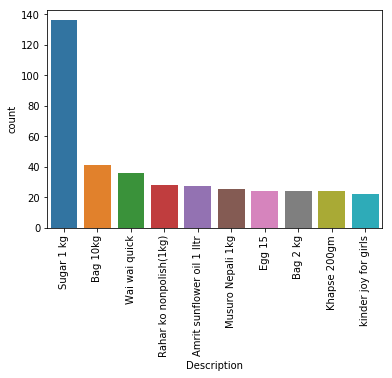

In [14]:
sns.countplot(x = 'Description', data = df, order = df['Description'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)


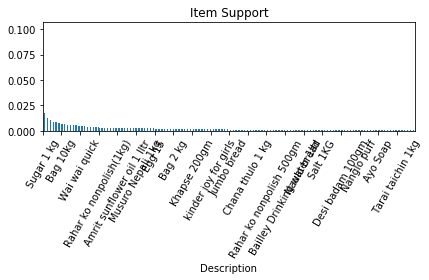

In [15]:
support = basket.sum().div(len(basket)).sort_values(ascending=False)
ax = support.plot.bar(title='Item Support')
ax.locator_params(nbins=20, axis='x')
plt.xticks(rotation=60)
plt.tight_layout();

In [16]:
#export_csv = rules.to_csv (r'E:\\Cuzta\\8thsem\\major\\data.csv', index = None, header=True)

In [17]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sugar 1 kg),(Amrit soyabean 1 ltr),0.101568,0.009709,0.003734,0.036765,3.786765,0.002748,1.028089
1,(Amrit soyabean 1 ltr),(Sugar 1 kg),0.009709,0.101568,0.003734,0.384615,3.786765,0.002748,1.459951
2,(Sugar 1 kg),(Amrit sunflower oil 1 lltr),0.101568,0.020164,0.002987,0.029412,1.458606,0.000939,1.009528
3,(Amrit sunflower oil 1 lltr),(Sugar 1 kg),0.020164,0.101568,0.002987,0.148148,1.458606,0.000939,1.054681
4,(Bag 10kg),(Kaju cookies),0.030620,0.008962,0.002987,0.097561,10.886179,0.002713,1.098177
5,(Kaju cookies),(Bag 10kg),0.008962,0.030620,0.002987,0.333333,10.886179,0.002713,1.454070
6,(Bag 10kg),(Sugar 1 kg),0.030620,0.101568,0.003734,0.121951,1.200681,0.000624,1.023214
7,(Sugar 1 kg),(Bag 10kg),0.101568,0.030620,0.003734,0.036765,1.200681,0.000624,1.006379
8,(Britannia suger free 200gr),(Bailley Drinking water 1ltr),0.005975,0.013443,0.004481,0.750000,55.791667,0.004401,3.946229
9,(Bailley Drinking water 1ltr),(Britannia suger free 200gr),0.013443,0.005975,0.004481,0.333333,55.791667,0.004401,1.491038


In [18]:
rules.rename(columns={'antecedent support':'antecedent_support',
                          'consequent support':'consequent_support'}, 
                 inplace=True)
 

In [19]:
rules

,antecedents,consequents,antecedent_support,consequent_support,support,confidence,lift,leverage,conviction
0,(Sugar 1 kg),(Amrit soyabean 1 ltr),0.101568,0.009709,0.003734,0.036765,3.786765,0.002748,1.028089
1,(Amrit soyabean 1 ltr),(Sugar 1 kg),0.009709,0.101568,0.003734,0.384615,3.786765,0.002748,1.459951
2,(Sugar 1 kg),(Amrit sunflower oil 1 lltr),0.101568,0.020164,0.002987,0.029412,1.458606,0.000939,1.009528
3,(Amrit sunflower oil 1 lltr),(Sugar 1 kg),0.020164,0.101568,0.002987,0.148148,1.458606,0.000939,1.054681
4,(Bag 10kg),(Kaju cookies),0.030620,0.008962,0.002987,0.097561,10.886179,0.002713,1.098177
5,(Kaju cookies),(Bag 10kg),0.008962,0.030620,0.002987,0.333333,10.886179,0.002713,1.454070
6,(Bag 10kg),(Sugar 1 kg),0.030620,0.101568,0.003734,0.121951,1.200681,0.000624,1.023214
7,(Sugar 1 kg),(Bag 10kg),0.101568,0.030620,0.003734,0.036765,1.200681,0.000624,1.006379
8,(Britannia suger free 200gr),(Bailley Drinking water 1ltr),0.005975,0.013443,0.004481,0.750000,55.791667,0.004401,3.946229
9,(Bailley Drinking water 1ltr),(Britannia suger free 200gr),0.013443,0.005975,0.004481,0.333333,55.791667,0.004401,1.491038


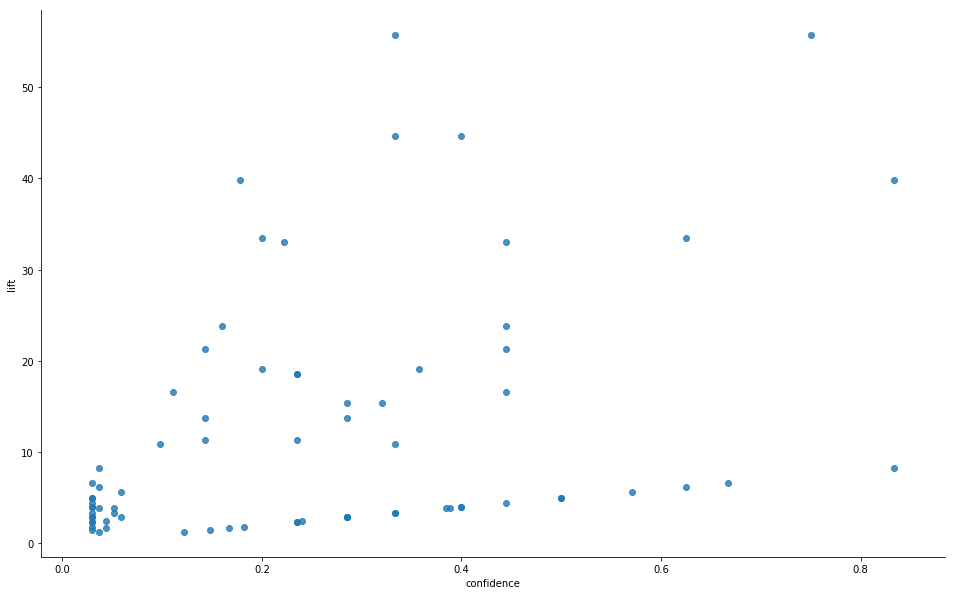

In [20]:
sns.lmplot(data=rules, x='confidence', y='lift', 
           fit_reg=False)
plt.gcf().set_size_inches(15, 9);

In [43]:
frequent_itemsets = apriori(basket_sets, min_support = 0.0025, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets['itemsets']= frequent_itemsets['itemsets'].apply( 
   lambda x: pd.Series(str(x).split("_")))
frequent_itemsets = pd.DataFrame(list(frequent_itemsets['itemsets']), columns=['col1', 'col2'])
frequent_itemsets

ValueError: Shape of passed values is (330, 1), indices imply (330, 2)

In [38]:
frequent_itemsets = pd.DataFrame(list(itemsets), columns=['col1', 'col2'])


NameError: name 'itemsets' is not defined

In [22]:
#find the min support
frequent_itemsets.sort_values('support', ascending=True).head()

,support,itemsets,length
164,0.002987,(Nandan soya 1ltr),1
95,0.002987,(Fruttino),1
214,0.002987,(Real mango 1 ltr),1
224,0.002987,(Savory Mango 400g),1
90,0.002987,(Fair n Handsome oil control 25 gm),1


In [28]:
frequent_itemsets1=frequent_itemsets.sort_values('length', ascending=False).head() 
frequent_itemsets1

,support,itemsets,length
329,0.003734,"(Musuro Nepali 1kg, Rahar ko nonpolish(1kg), S...",3
312,0.003734,"(Musuro Nepali 1kg, Mung ko khosta1kg)",2
310,0.002987,"(Rahar ko nonpolish(1kg), Mung daal 1kg)",2
309,0.002987,"(Musuro Nepali 1kg, Mung daal 1kg)",2
308,0.002987,"(Mash ko daal (NonPollish)500gm, Sugar 1 kg)",2


In [ ]:
engine = create_engine("mysql+pymysql://root:@localhost/practisedjangodb")
con = engine.connect()

rules.head(60).to_sql(name='relation_relation', con=engine, if_exists = 'append', index=False)

In [24]:
frequent_itemsets.sort_values('support', ascending=False).head(10) 

,support,itemsets,length
240,0.101568,(Sugar 1 kg),1
16,0.030620,(Bag 10kg),1
266,0.026886,(Wai wai quick),1
205,0.020911,(Rahar ko nonpolish(1kg)),1
7,0.020164,(Amrit sunflower oil 1 lltr),1
160,0.018671,(Musuro Nepali 1kg),1
85,0.017924,(Egg 15),1
125,0.017924,(Khapse 200gm),1
17,0.017924,(Bag 2 kg),1
280,0.016430,(kinder joy for girls),1


In [25]:
#show visualization 



C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


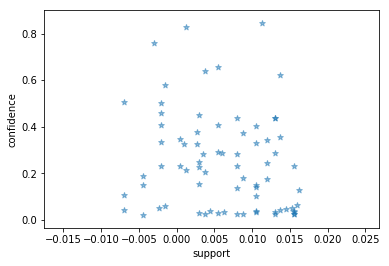

In [26]:
support=rules.as_matrix(columns=['support'])
confidence=rules.as_matrix(columns=['confidence'])

import random
import matplotlib.pyplot as plt
 
 
for i in range (len(support)):
   support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5) 
   confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)
 
plt.scatter(support, confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


AttributeError: 'DataFrame' object has no attribute 'edges'

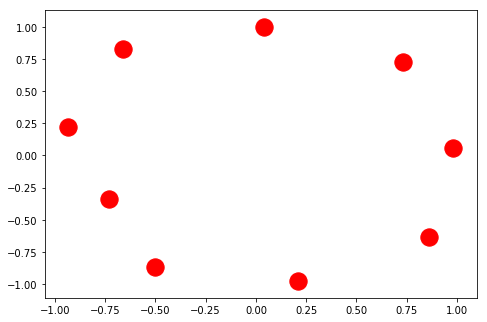

In [27]:
%matplotlib inline
import networkx as nx

antecedents=rules.as_matrix(columns=['antecedents'])
consequents=rules.as_matrix(columns=['consequents'])
import matplotlib.pyplot as plt

G = nx.Graph()

G.add_edge('antecedents','consequents')
nx.draw(rules)

In [ ]:
num_nodes = 200
edge = rules['consequents'][:num_nodes]
#create graph G
G = nx.Graph()
#G.add_nodes_from(node)
G.add_edges_from(edge)
#get a x,y position for each node
pos = nx.layout.spring_layout(G)

#Create Edges
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines')
for edge in G.edges():
    x0, y0 = G.node[edge[0]]['antecedents']
    x1, y1 = G.node[edge[1]]['consequents']
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

In [ ]:
!pip install pygraphviz 

B = pgv.AGraph()

# Setting node attributes that are common for all nodes 
B.node_attr['style']='filled'
B.node_attr['shape']='circle'
B.node_attr['fixedsize']='true'
B.node_attr['fontcolor']='#FFFFFF'

# Creating and setting node attributes that vary for each node (using a for loop)
for i in range(16):
 B.add_edge(0,i)
 n=B.get_node(i)
 n.attr['fillcolor']="#%2x0000"%(i*16)
 n.attr['height']="%s"%(i/16.0+0.5)
 n.attr['width']="%s"%(i/16.0+0.5)
B.draw('star.png',prog="circo") # This creates a .png file in the local directory. Displayed below.

Image('images/star.png', width=650) # The Graph visualization we created above.

In [ ]:
#connection=mysql.connector.connect(host='localhost',
 #                                 user='root',
  #                                password='practisedjangodb',
   #                               db='')

In [ ]:
#connection

In [ ]:
#majorproject_tables=pd.read_sql_query('SHOW TABLES from practisedjangodb',connection)

In [ ]:
#majorproject_tables

In [ ]:
engine = create_engine("mysql+pymysql://root:@localhost/practisedjangodb")
con = engine.connect()

rules.head(60).to_sql(name='relation_relation', con=engine, if_exists = 'append', index=False)